# **DS514/515 Final Project**

# หัวข้อ : **Heart disease prediction**

**สมาชิก:**
<br>1) Narawit Tharapoompipat (ID: 68199160275)
<br>2) Ratanaporn Thaochalee (ID : 68199160293)
<br>3) Sakdhithad chanfeungfu (ID : 68199160301)<br>
**Dataset:** framingham dataset<br>
**link Source:** [Kaggle-HEART DISEASE PREDICTION](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression/data)

## **About the data**
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’s information. It includes over 4,000 records and 15 attributes.


<br>**Attribute**
<br>1. Sex: 0=female and 1=male(Nominal)
<br>2. Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioral
<br>3. Education: The education level of the patients 1=0-11 years
2=High School Diploma, GED
3=Some College, Vocational School
4=College (BS, BA) degree or more
<br>4. Current Smoker: whether or not the patient is a current smoker (Nominal)
<br>5. Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
Medical( history)
<br>6. BP Meds: whether or not the patient was on blood pressure medication (Nominal)
<br>7. Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
<br>8. Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
<br>9. Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)
<br>10. Tot Chol: total cholesterol level (Continuous)
<br>11. Sys BP: systolic blood pressure (Continuous)
<br>12. Dia BP: diastolic blood pressure (Continuous)
<br>13. BMI: Body Mass Index (Continuous)
<br>14. Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
<br>15. Glucose: glucose level (Continuous)
Predict variable (desired target)
<br>16. 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


## **Import Packages**

In [ ]:
# import general library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# import machine learnign library
from sklearn.preprocessing import  RobustScaler, PolynomialFeatures, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score,precision_recall_curve, auc,  precision_recall_curve, PrecisionRecallDisplay
from imblearn.over_sampling import  SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics


## **Import Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import dataset and change column names to snake case.

In [ ]:
# import data
df = pd.read_csv('/content/drive/MyDrive/DS512-514 Final project/framingham_data.csv')
col = ["sex", "age", "education", "current_smoker", "cig_per_day", "bp_meds", "prevalent_stroke", "prevalenthyp", "diabetes", "total_chol", "sys_bp", "dia_bp", "bmi", "heart_rate", "glucose", "ten_year_chd"]
df.columns = col
df.head()

,sex,age,education,current_smoker,cig_per_day,bp_meds,prevalent_stroke,prevalenthyp,diabetes,total_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,ten_year_chd
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.shape

(4238, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               4238 non-null   int64  
 1   age               4238 non-null   int64  
 2   education         4133 non-null   float64
 3   current_smoker    4238 non-null   int64  
 4   cig_per_day       4209 non-null   float64
 5   bp_meds           4185 non-null   float64
 6   prevalent_stroke  4238 non-null   int64  
 7   prevalenthyp      4238 non-null   int64  
 8   diabetes          4238 non-null   int64  
 9   total_chol        4188 non-null   float64
 10  sys_bp            4238 non-null   float64
 11  dia_bp            4238 non-null   float64
 12  bmi               4219 non-null   float64
 13  heart_rate        4237 non-null   float64
 14  glucose           3850 non-null   float64
 15  ten_year_chd      4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.

## **Data cleaning**


In [ ]:
df.isna().sum()

,0
sex,0
age,0
education,105
current_smoker,0
cig_per_day,29
bp_meds,53
prevalent_stroke,0
prevalenthyp,0
diabetes,0
total_chol,50


There are many missing values in the dataset, especialliy, in glucose attribute. So, we drop them.

In [ ]:
# drop missing values
df.dropna(inplace=True)


Next, we gonna change to data type to appropriate type.

In [ ]:
# change data type of education, cig_per_day, bp_meds
df['education'] = df['education'].astype('int64')
df['cig_per_day'] = df['cig_per_day'].astype('int64')
df['bp_meds'] = df['bp_meds'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               3656 non-null   int64  
 1   age               3656 non-null   int64  
 2   education         3656 non-null   int64  
 3   current_smoker    3656 non-null   int64  
 4   cig_per_day       3656 non-null   int64  
 5   bp_meds           3656 non-null   int64  
 6   prevalent_stroke  3656 non-null   int64  
 7   prevalenthyp      3656 non-null   int64  
 8   diabetes          3656 non-null   int64  
 9   total_chol        3656 non-null   float64
 10  sys_bp            3656 non-null   float64
 11  dia_bp            3656 non-null   float64
 12  bmi               3656 non-null   float64
 13  heart_rate        3656 non-null   float64
 14  glucose           3656 non-null   float64
 15  ten_year_chd      3656 non-null   int64  
dtypes: float64(6), int64(10)
memory usage: 485.6 KB

Finally, it is ready to EDA and modeling.

## **Explore Data Analysis**

### Descriptive statistic

In [ ]:
# Descirptive statistic for categorical variable
cat_var = ['sex', 'education', 'current_smoker', 'bp_meds','prevalent_stroke', 'prevalenthyp', 'diabetes']
df[cat_var].astype('category').describe().T

,count,unique,top,freq
sex,3656,2,0,2034
education,3656,4,1,1526
current_smoker,3656,2,0,1868
bp_meds,3656,2,0,3545
prevalent_stroke,3656,2,0,3635
prevalenthyp,3656,2,0,2517
diabetes,3656,2,0,3557


In [ ]:
# Descirptive statistic for numerical variable
num_var = ['age','cig_per_day','total_chol', 'sys_bp', 'dia_bp', 'bmi', 'heart_rate', 'glucose']
df[num_var].describe().T

,count,mean,std,min,25%,50%,75%,max
age,3656.0,49.557440,8.561133,32.00,42.00,49.00,56.00,70.0
cig_per_day,3656.0,9.022155,11.918869,0.00,0.00,0.00,20.00,70.0
total_chol,3656.0,236.873085,44.096223,113.00,206.00,234.00,263.25,600.0
sys_bp,3656.0,132.368025,22.092444,83.50,117.00,128.00,144.00,295.0
dia_bp,3656.0,82.912062,11.974825,48.00,75.00,82.00,90.00,142.5
bmi,3656.0,25.784185,4.065913,15.54,23.08,25.38,28.04,56.8
heart_rate,3656.0,75.730580,11.982952,44.00,68.00,75.00,82.00,143.0
glucose,3656.0,81.856127,23.910128,40.00,71.00,78.00,87.00,394.0


### Target distribution

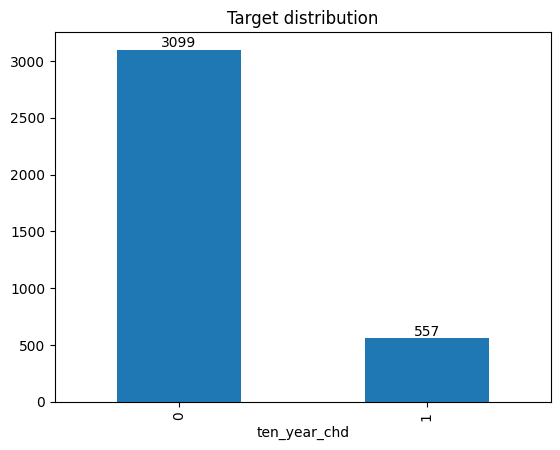

In [ ]:
# Plot of target distribution
ax = df['ten_year_chd'].value_counts().plot(kind='bar')
plt.title('Target distribution')

# Add data labels
for i, v in enumerate(df['ten_year_chd'].value_counts()):
    plt.text(i, v + 0.3, str(v), ha='center', va='bottom')

plt.show()


The bar chart shows the distribution of the target variable `ten_year_chd`, which represents the risk of developing coronary heart disease within ten years.

Class 0 (No CHD): 3,099 cases<br>
Class 1 (CHD): 557 cases

This indicates a significant class imbalance, where the majority of observations belong to class 0. The ratio is approximately 5.6:1, meaning the dataset is heavily skewed toward individuals without CHD risk.

### Distribution and correlation of variables

#### Categorical variables

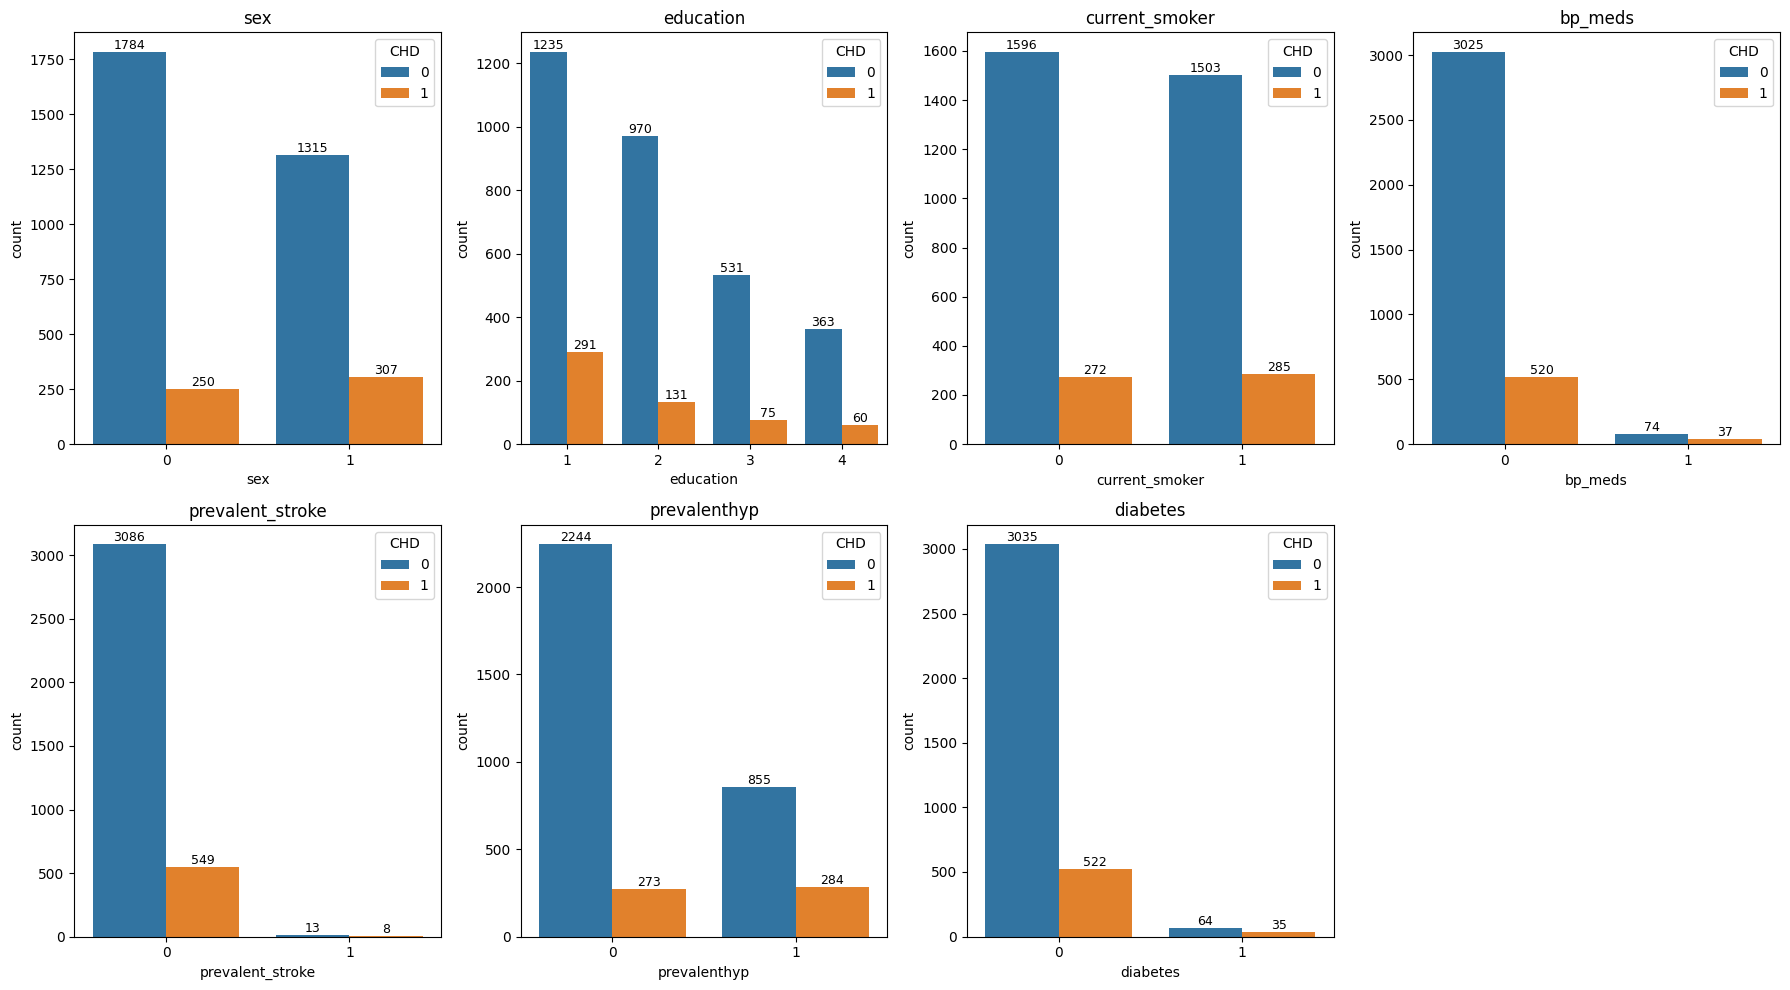

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(18, 10)) # Increased figsize for better label visibility
ax = ax.flatten()

for i, var in enumerate(cat_var):
    sns.countplot(data=df, x=var, hue='ten_year_chd', ax=ax[i])
    ax[i].set_title(var)
    ax[i].legend(title='CHD', loc='upper right')

    # Add data labels
    for container in ax[i].containers: # Iterate through each legend group (hue categories)
        for j, p in enumerate(container): # Iterate through each bar in the group
            height = p.get_height()
            if height > 0: # Only add label if bar has height
                ax[i].text(p.get_x() + p.get_width() / 2., # X-coordinate for label
                           height,                          # Y-coordinate for label
                           f'{int(height)}',               # Label text (integer for count)
                           ha='center',                     # Horizontal alignment
                           va='bottom',                    # Vertical alignment (above the bar)
                           fontsize=9,
                           color='black')

ax[7].set_visible(False)
plt.tight_layout()
plt.show()

From these plots, we can conclude that certain pre-existing conditions and demographic factors are associated with a higher likelihood of Coronary Heart Disease in this dataset:

- sex=1 (Male) shows a higher proportion of CHD. <br>
- education=1 (lowest level of education) had a higher proportion of CHD. However, we believe it is unrelated to the health parameter and will be removed during model training.<br>
- bp_meds=1 (on blood pressure medication), prevalenthyp=1 (prevalent hypertension), prevalent_stroke=1 (history of stroke), and diabetes=1 (diabetes) all have significantly higher rates of CHD, which is consistent with medical understanding of these conditions as major risk factors for cardiovascular disease.<br>
- current_smoker=1 (current smoker) shows a slightly elevated proportion of CHD.

#### Numerical variable

Distribution

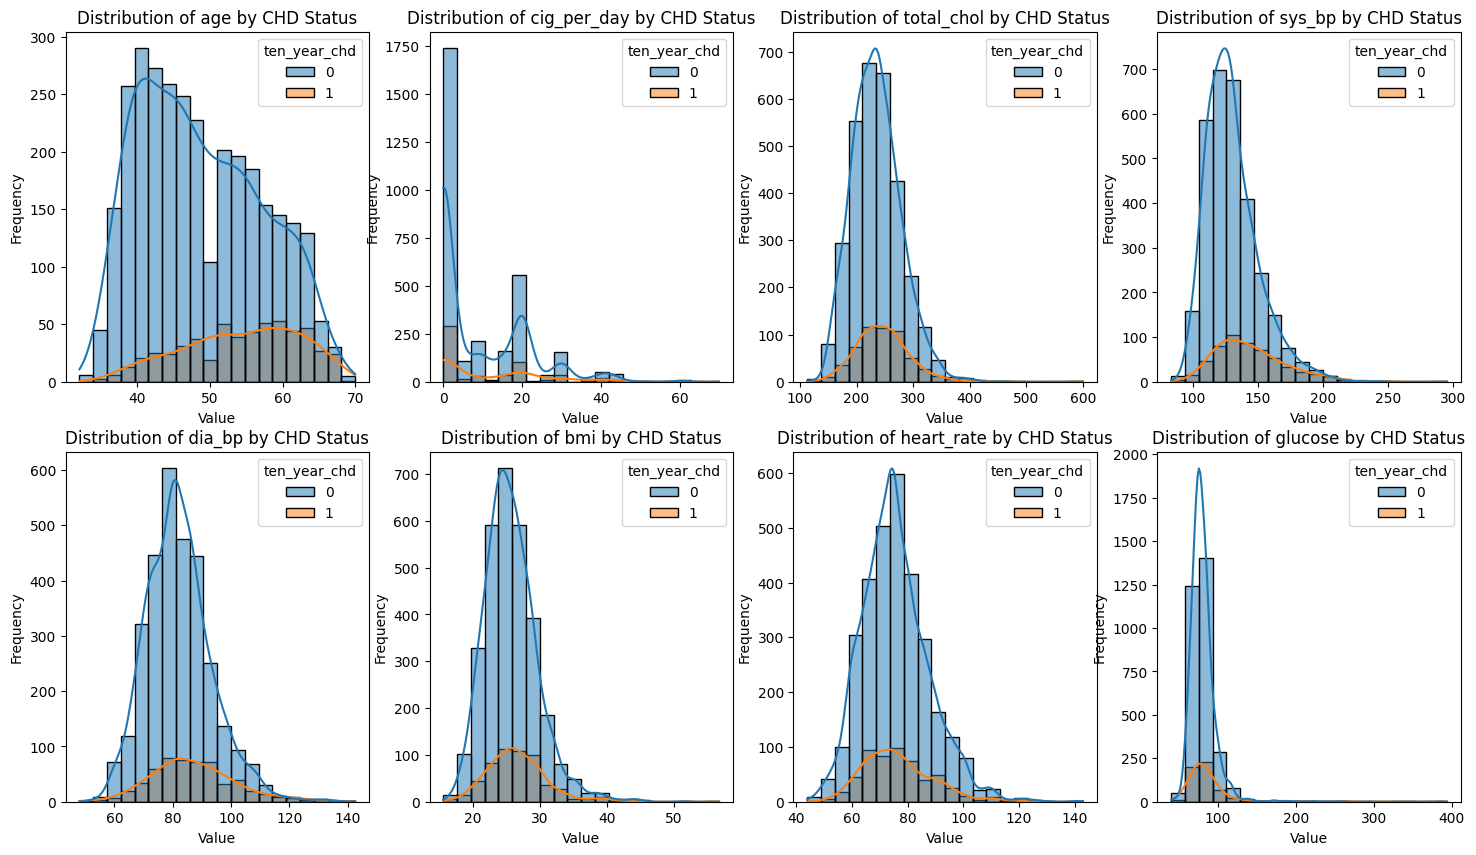

In [ ]:
# find numerical variable
fig, ax = plt.subplots(2, 4, figsize=(18, 10))
ax = ax.flatten()

for i, var in enumerate(num_var):

  sns.histplot(data=df, x=var,hue='ten_year_chd', bins=20, kde=True,ax=ax[i])
  ax[i].set_title(f'Distribution of {var} by CHD Status')
  ax[i].set_xlabel('Value')
  ax[i].set_ylabel('Frequency')


plt.show()

Box plot

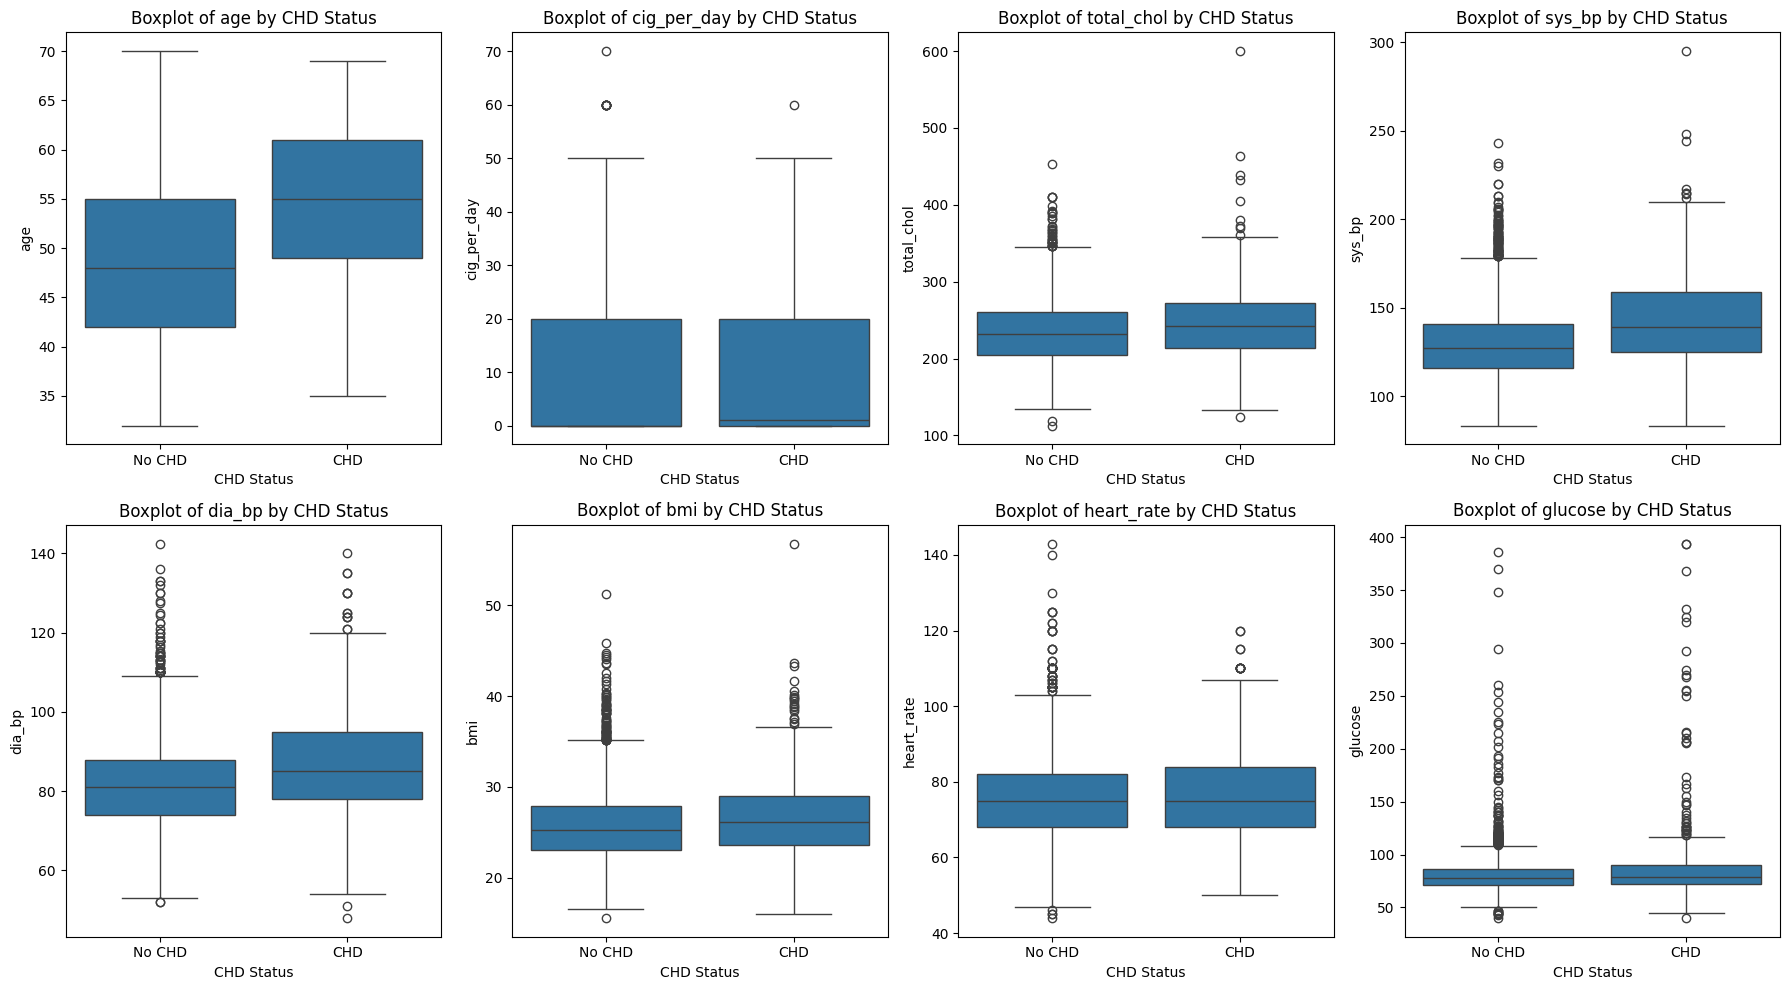

In [ ]:
# box plot
fig, ax = plt.subplots(2, 4, figsize=(18, 10))
ax = ax.flatten()

df_plot = df.copy()
df_plot['ten_year_chd'] = df_plot['ten_year_chd'].map({0: 'No CHD', 1: 'CHD'})

for i, var in enumerate(num_var):
    sns.boxplot(data=df_plot, x='ten_year_chd', y=var, ax=ax[i])
    ax[i].set_title(f'Boxplot of {var} by CHD Status')
    ax[i].set_xlabel('CHD Status')
    ax[i].set_ylabel(var)

plt.tight_layout()
plt.show()

The box plots suggest that age, systolic blood pressure (sys_bp), diastolic blood pressure (dia_bp), total cholesterol (total_chol), and glucose tend to be higher in individuals with Coronary Heart Disease (CHD) compared to those without CHD. BMI also shows a slight elevation in the CHD group. Heart rate and cig per day appears to be quite similar between the two groups based on these visualizations. These differences in distributions indicate potential risk factors for CHD.

Skewness

In [ ]:
num_var = ['age','cig_per_day','total_chol', 'sys_bp', 'dia_bp', 'bmi', 'heart_rate', 'glucose']

In [ ]:
df[num_var].skew()

,0
age,0.231170
cig_per_day,1.229832
total_chol,0.663700
sys_bp,1.163695
dia_bp,0.710388
bmi,0.999373
heart_rate,0.670982
glucose,6.280265


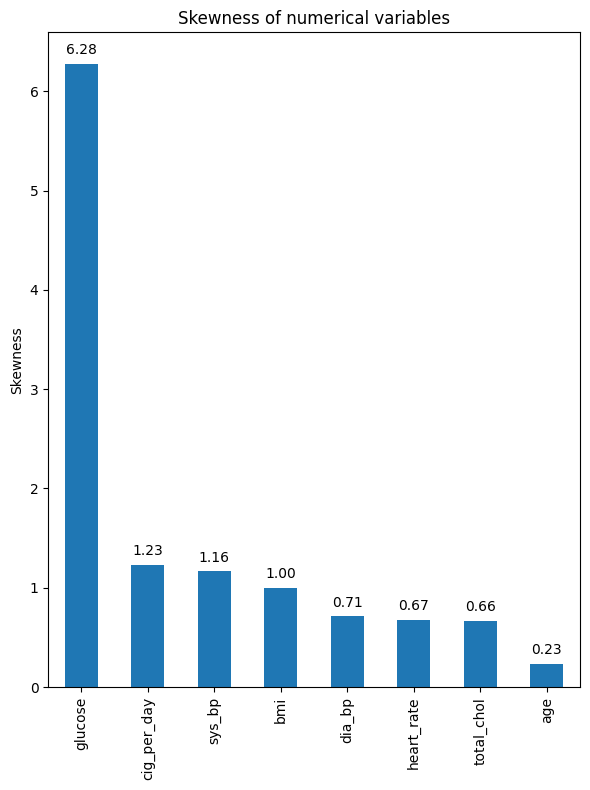

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(6, 8))
ax = df[num_var].skew().sort_values(ascending = False).plot(kind='bar')
ax.bar_label(ax.containers[0], fmt='%.2f', padding=5)
plt.title('Skewness of numerical variables')
plt.ylabel('Skewness')
plt.tight_layout()
plt.show()

All numerical variables in this dataset are positively skewed to varying degrees. glucose stands out as being extremely positively skewed, indicating a significant presence of high outliers or a very uneven distribution. The blood pressure variables (sys_bp, dia_bp), bmi, heart_rate, and total_chol are moderately to highly positively skewed.

Relationship of age and other health parameters

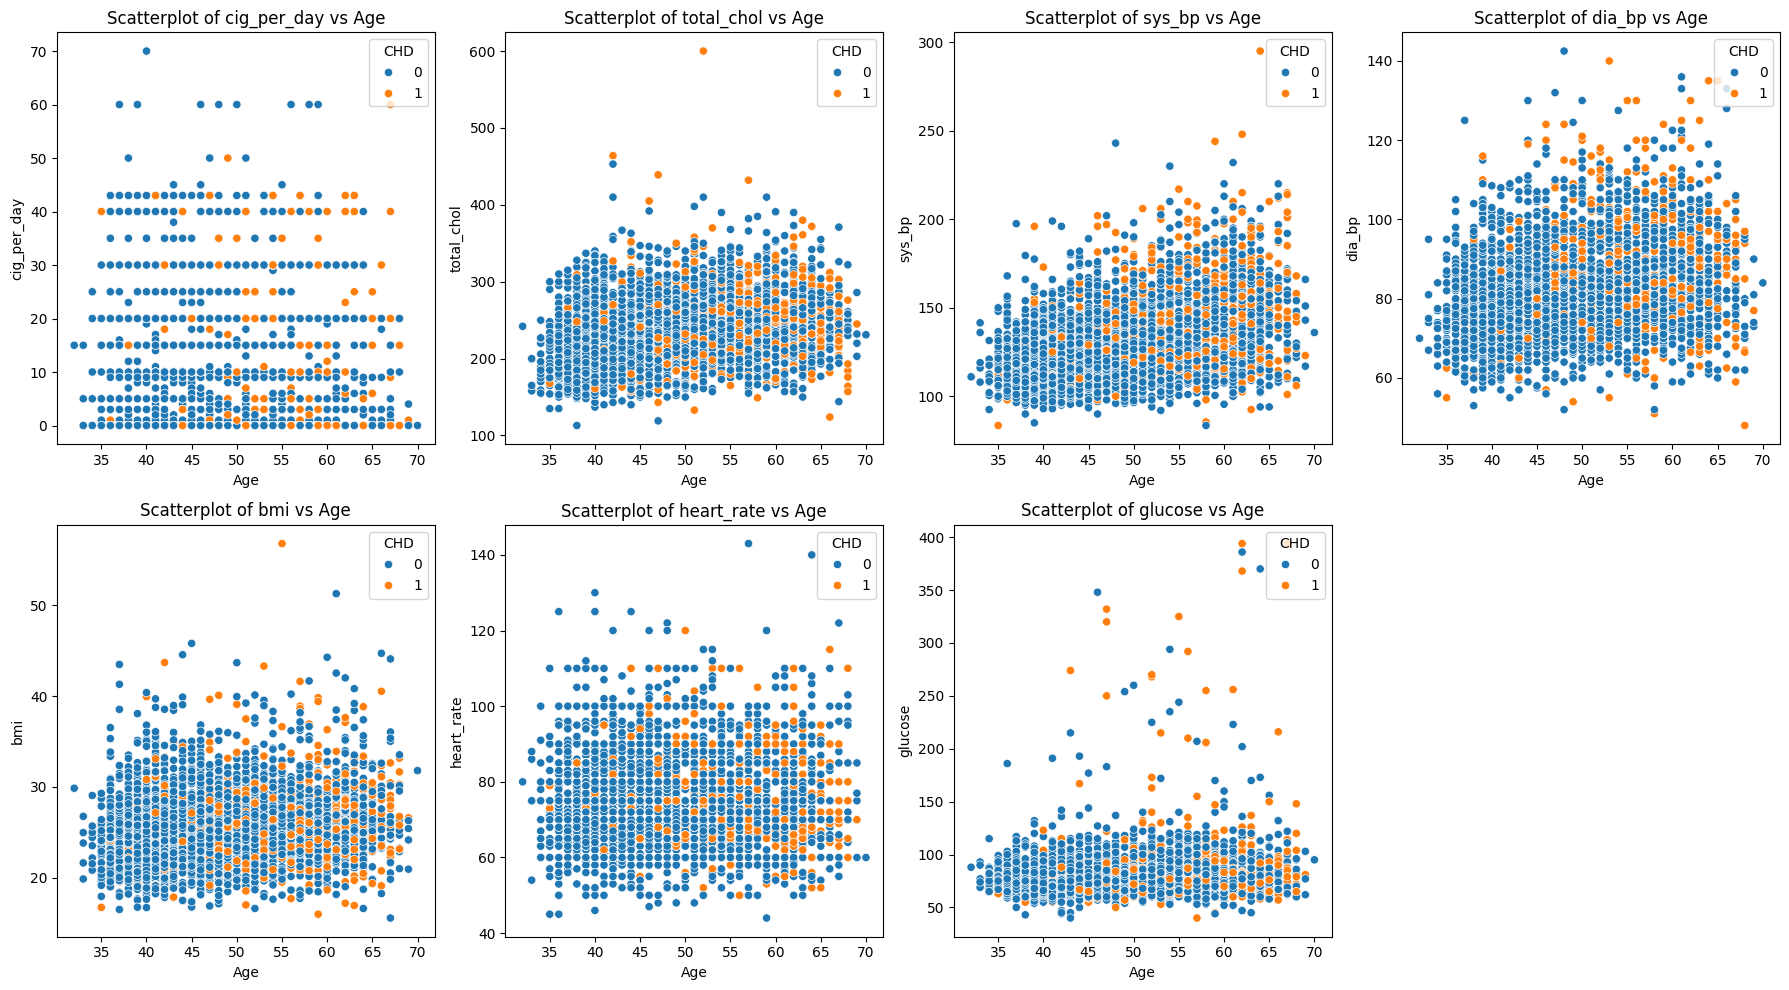

In [ ]:
# Age vs other health parameter
fig, ax = plt.subplots(2, 4, figsize=(18, 10))
ax = ax.flatten()
for i, var in enumerate(num_var[1:]):
    sns.scatterplot(data=df, x='age', y=var, hue='ten_year_chd', ax=ax[i])
    ax[i].set_title(f'Scatterplot of {var} vs Age')
    ax[i].set_xlabel('Age')
    ax[i].set_ylabel(var)
    ax[i].legend(title='CHD', loc='upper right')

ax[7].set_visible(False)
plt.tight_layout()
plt.show()

From these scatter plots, Age does not appear to be strongly correlated with any of the individual health parameters, nor does it visually clarify the distinction between CHD and Non-CHD cases.

However, in age vs glucose plot, the outliers at high glucose levels are predominantly CHD cases, suggesting that high blood glucose may be a significant risk factor in this dataset, regardless of the person's age.

## **Data pre-processing**

As considered above, we believe that the education is unrelated to the health parameter and will be removed during model training, as well as current_smoker due to its molticolinearity to cig_per_day.

In [ ]:
df.drop(['education','current_smoker'], axis=1, inplace=True)
df.head()

,sex,age,cig_per_day,bp_meds,prevalent_stroke,prevalenthyp,diabetes,total_chol,sys_bp,dia_bp,bmi,heart_rate,glucose,ten_year_chd
0,1,39,0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,20,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,30,0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,23,0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


All categorical variables are encoded, so we will then transform numerical variables using RobustScaler to handling outlier.

In [ ]:
# Train test split
X = df.drop('ten_year_chd', axis=1)
y = df['ten_year_chd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=54,stratify = y)

In [ ]:
# Scaling data using RobustScaler
r_sc = RobustScaler()
X_train[num_var] = r_sc.fit_transform(X_train[num_var])
X_test[num_var] = r_sc.transform(X_test[num_var])

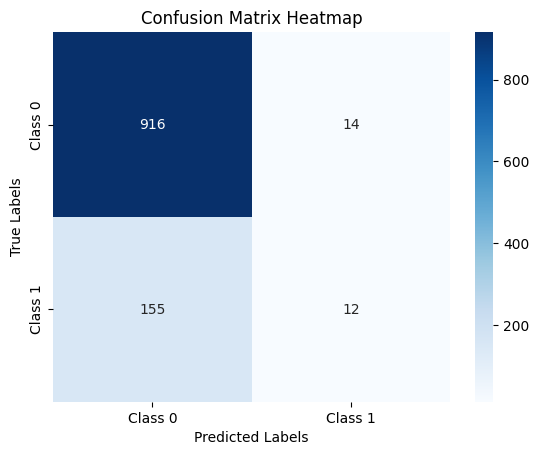

              precision    recall  f1-score   support

     Class 0       0.86      0.98      0.92       930
     Class 1       0.46      0.07      0.12       167

    accuracy                           0.85      1097
   macro avg       0.66      0.53      0.52      1097
weighted avg       0.80      0.85      0.80      1097



In [ ]:
# Screening building LogisticRegression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

y_pred_test = lr.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=['Class 0', 'Class 1'])

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()
print(report)


Initial model evaluations highlighted that an imbalanced class distribution within the dataset led to suboptimal performance, characterized by reduced recall and precision scores. <br>
For many machine learning tasks on imbalanced datasets, we normally care more about recall than precision. As a baseline, we want the model to be able to find all risk patient and we would allow the model to make false-positive errors because the cost of false positives is usually not very high. On the other hand, failing to recognize positive examples can be life-threatening

As such, our priority is to improve the model's recall, then we will also want to keep precision as high as possible.

## **Build Machine Learning Model**

To enhance model robustness and performance on imbalanced data, we propose to apply several techniques: class reweighting, oversampling (via SMOTE), and undersampling. These techniques will be rigorously tested and compared using various classification algorithms, including `LogisticRegression`, `KNeighborsClassifier`, `RidgeClassifier`.

In [ ]:
# Train test split
X = df.drop('ten_year_chd', axis=1)
y = df['ten_year_chd']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=54,stratify = y)

In [ ]:
# Specify feature for training model
cat_var = ['sex', 'bp_meds','prevalent_stroke', 'prevalenthyp', 'diabetes']
num_var = ['age','cig_per_day','total_chol', 'sys_bp', 'dia_bp', 'bmi', 'heart_rate', 'glucose']


### **Logistic regression**

#### **Class reweighing**

In [ ]:
np.logspace(-3, 3, 7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_var),
        ('cat', 'passthrough', cat_var) ],
    remainder='passthrough')

pipe_step = [
    ('scaler', preprocessor),
    ('log', LogisticRegression(max_iter=10000,solver='liblinear', random_state=42))]

param_grid = {
    'log__C': np.logspace(-3, 3, 7),
    'log__penalty': ['l1', 'l2'],
    'log__class_weight' : ['balanced', None, {1: 2},{1: 3},{1: 4},{1: 5}, {1: 6}, {1: 7}, {1: 8}, {1: 9}, {1: 10}]
}

scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
    }

pipe = Pipeline(pipe_step)
grid = GridSearchCV(pipe, param_grid, cv=5,scoring = scoring, refit="recall",n_jobs=-1)
grid.fit(X_train, y_train)
best_index = grid.best_index_

print(f"Best parameter : {grid.best_params_}")
print(f"F1 score : {grid.best_score_:.2f}")
print(f"Accuracy : {grid.cv_results_["mean_test_accuracy"][best_index]:.2f}")
print(f"Precision : {grid.cv_results_["mean_test_precision"][best_index]:.2f}")
print(f"Recall : {grid.cv_results_["mean_test_recall"][best_index]:.2f}")



Best parameter : {'log__C': np.float64(0.001), 'log__class_weight': {1: 10}, 'log__penalty': 'l2'}
F1 score : 0.93
Accuracy : 0.38
Precision : 0.19
Recall : 0.93


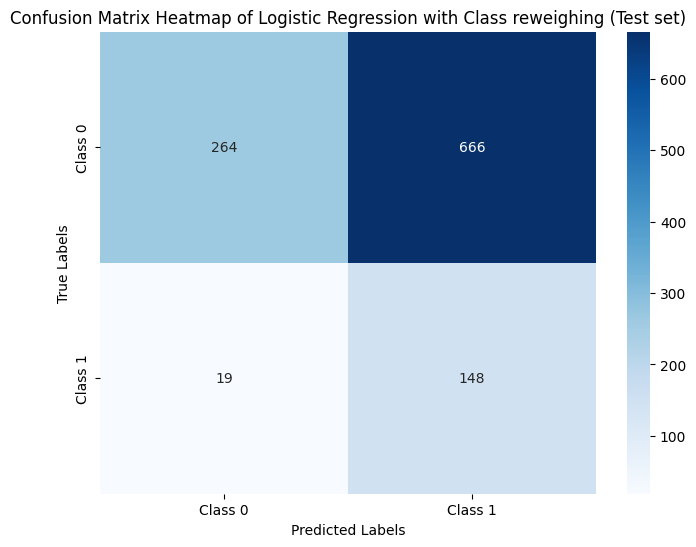

              precision    recall  f1-score   support

     Class 0       0.93      0.28      0.44       930
     Class 1       0.18      0.89      0.30       167

    accuracy                           0.38      1097
   macro avg       0.56      0.59      0.37      1097
weighted avg       0.82      0.38      0.41      1097



In [ ]:
# perform to test set
best_grid = grid.best_estimator_
y_pred_test = best_grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=['Class 0', 'Class 1'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap of Logistic Regression with Class reweighing (Test set)')
plt.show()

# Display classification report
print(report)

In [ ]:
# Calculate matrics and store in the list
results_list = []
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

results_dict = {
    'model_name': 'Logistic Regression (Class Reweighting)',
    'model_parameters': grid.best_params_,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}
results_list.append(results_dict)

In [ ]:
results_list

[{'model_name': 'Logistic Regression (Class Reweighting)',
  'model_parameters': {'log__C': np.float64(0.001),
   'log__class_weight': {1: 10},
   'log__penalty': 'l2'},
  'accuracy': 0.37556973564266183,
  'precision': 0.18181818181818182,
  'recall': 0.8862275449101796,
  'f1_score': 0.30173292558613657}]

#### **Oversampling SMOTE**

In [ ]:
# Example SMOTE
smote_sampler = SMOTE(random_state = 42)
X_smo, y_smo = smote_sampler.fit_resample(X_train, y_train)

<Axes: xlabel='ten_year_chd'>

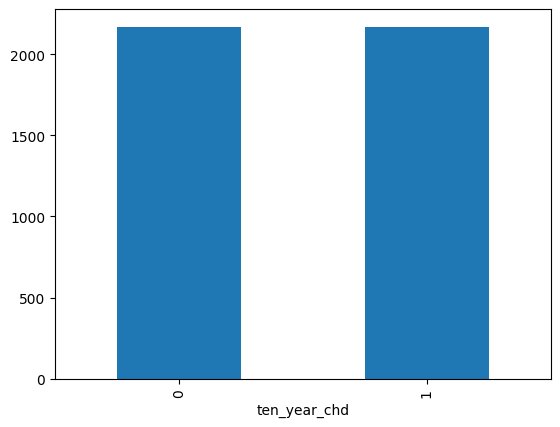

In [ ]:
y_smo.value_counts().plot(kind='bar')

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_var),
        ('cat', 'passthrough', cat_var)],
    remainder='passthrough')

pipe_step = [
    ('scaler', preprocessor),
    ('smote', SMOTE(random_state=42)),  # SMOTE inside pipeline!
    ('log', LogisticRegression(max_iter=10000, solver='liblinear', random_state=42))
]

param_grid = {
    'smote__k_neighbors': [3, 5, 7],
    'log__C': np.logspace(-3, 3, 7),
    'log__penalty': ['l1', 'l2']
}

pipe = ImbPipeline(pipe_step)
grid = GridSearchCV(pipe, param_grid, cv=5,scoring = scoring, refit="recall",n_jobs=-1)
grid.fit(X_train, y_train)
best_index = grid.best_index_

print(f"Best parameter : {grid.best_params_}")
print(f"F1 score : {grid.best_score_:.2f}")
print(f"Accuracy : {grid.cv_results_["mean_test_accuracy"][best_index]:.2f}")
print(f"Precision : {grid.cv_results_["mean_test_precision"][best_index]:.2f}")
print(f"Recall : {grid.cv_results_["mean_test_recall"][best_index]:.2f}")


Best parameter : {'log__C': np.float64(0.001), 'log__penalty': 'l2', 'smote__k_neighbors': 3}
F1 score : 0.77
Accuracy : 0.59
Precision : 0.24
Recall : 0.77


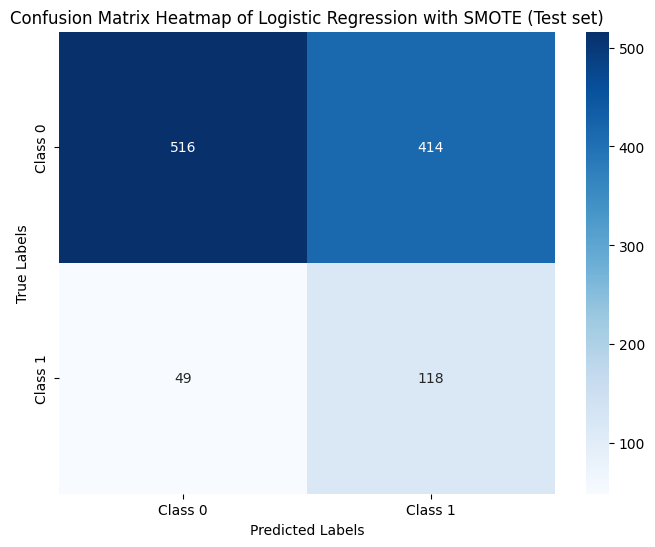

              precision    recall  f1-score   support

     Class 0       0.91      0.55      0.69       930
     Class 1       0.22      0.71      0.34       167

    accuracy                           0.58      1097
   macro avg       0.57      0.63      0.51      1097
weighted avg       0.81      0.58      0.64      1097



In [ ]:
# perform to test set
best_grid = grid.best_estimator_
y_pred_test = best_grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=['Class 0', 'Class 1'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap of Logistic Regression with SMOTE (Test set)')
plt.show()

# Display classification report
print(report)

In [ ]:
# Calculate matrics and store in the list
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

results_dict = {
    'model_name': 'Logistic Regression (SMOTE)',
    'model_parameters': grid.best_params_,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}
results_list.append(results_dict)

#### **Undersampling**

In [ ]:
# Undersampling example
under_sampler = RandomUnderSampler(random_state = 42)
X_under, y_under = under_sampler.fit_resample(X_train, y_train)

<Axes: xlabel='ten_year_chd'>

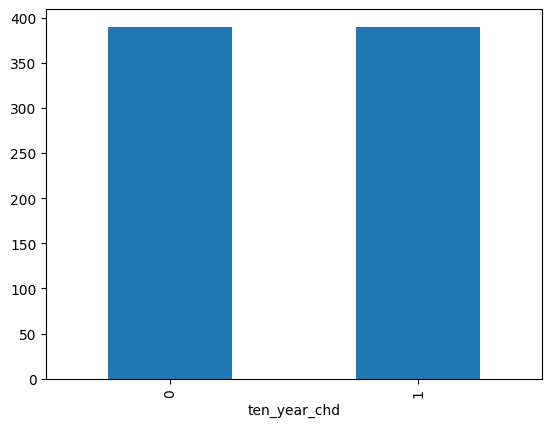

In [ ]:
y_under.value_counts().plot(kind='bar')

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_var),
        ('cat', 'passthrough', cat_var) ],
    remainder='passthrough')

pipe_step = [
    ('scaler', preprocessor),
    ('rus', RandomUnderSampler(random_state=42)),
    ('log', LogisticRegression(max_iter=10000,solver='liblinear', random_state=42))]

param_grid = {
    'log__C': np.logspace(-3, 3, 7),
    'log__penalty': ['l1', 'l2']
}

pipe = ImbPipeline(pipe_step)
grid = GridSearchCV(pipe, param_grid, cv=5,scoring = scoring, refit="recall",n_jobs=-1)
grid.fit(X_train, y_train)
best_index = grid.best_index_

print(f"Best parameter : {grid.best_params_}")
print(f"F1 score : {grid.best_score_:.2f}")
print(f"Accuracy : {grid.cv_results_["mean_test_accuracy"][best_index]:.2f}")
print(f"Precision : {grid.cv_results_["mean_test_precision"][best_index]:.2f}")
print(f"Recall : {grid.cv_results_["mean_test_recall"][best_index]:.2f}")

Best parameter : {'log__C': np.float64(0.001), 'log__penalty': 'l2'}
F1 score : 0.78
Accuracy : 0.54
Precision : 0.22
Recall : 0.78


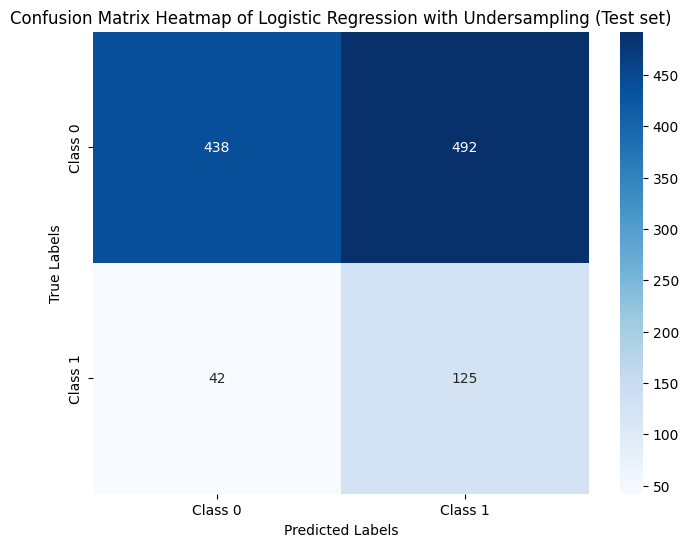

              precision    recall  f1-score   support

     Class 0       0.91      0.47      0.62       930
     Class 1       0.20      0.75      0.32       167

    accuracy                           0.51      1097
   macro avg       0.56      0.61      0.47      1097
weighted avg       0.80      0.51      0.58      1097



In [ ]:
# perform to test set
best_grid = grid.best_estimator_
y_pred_test = best_grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=['Class 0', 'Class 1'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap of Logistic Regression with Undersampling (Test set)')
plt.show()

# Display classification report
print(report)

In [ ]:
# Calculate matrics and store in the list
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

results_dict = {
    'model_name': 'Logistic Regression (Undersampling)',
    'model_parameters': grid.best_params_,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}
results_list.append(results_dict)

### **Elasticnet**

#### **Class reweighing**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_var),
        ('cat', 'passthrough', cat_var) ],
    remainder='passthrough')

pipe_step = [
    ('scaler', preprocessor),
    ('elas', LogisticRegression(max_iter=10000,solver='saga', penalty = 'elasticnet', random_state=42))]

param_grid = {
    'elas__C': np.logspace(-3, 3, 7),
    'elas__l1_ratio': [0, 0.25, 0.5, 0.75, 1],
    'elas__class_weight' : ['balanced', None, {1: 2},{1: 3},{1: 4},{1: 5}, {1: 6}, {1: 7}, {1: 8}, {1: 9}, {1: 10}]
}

pipe = Pipeline(pipe_step)
grid = GridSearchCV(pipe, param_grid, cv=5,scoring = scoring, refit="recall",n_jobs=-1)
grid.fit(X_train, y_train)
best_index = grid.best_index_

print(f"Best parameter : {grid.best_params_}")
print(f"F1 score : {grid.best_score_:.2f}")
print(f"Accuracy : {grid.cv_results_["mean_test_accuracy"][best_index]:.2f}")
print(f"Precision : {grid.cv_results_["mean_test_precision"][best_index]:.2f}")
print(f"Recall : {grid.cv_results_["mean_test_recall"][best_index]:.2f}")



Best parameter : {'elas__C': np.float64(0.001), 'elas__class_weight': {1: 6}, 'elas__l1_ratio': 0.5}
F1 score : 1.00
Accuracy : 0.15
Precision : 0.15
Recall : 1.00


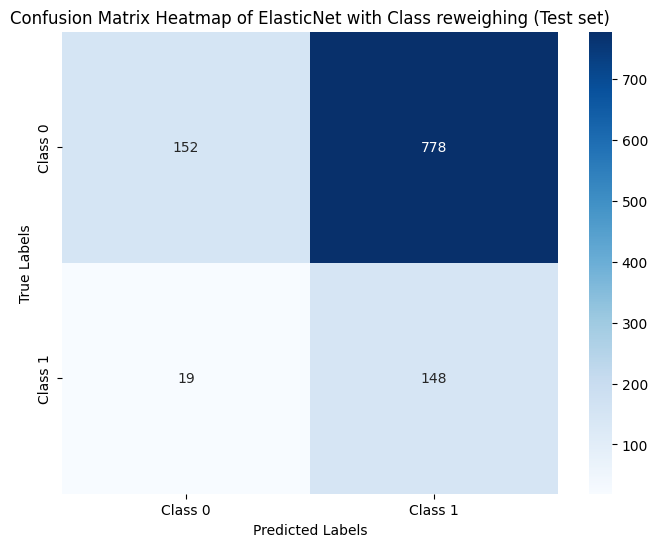

              precision    recall  f1-score   support

     Class 0       0.89      0.16      0.28       930
     Class 1       0.16      0.89      0.27       167

    accuracy                           0.27      1097
   macro avg       0.52      0.52      0.27      1097
weighted avg       0.78      0.27      0.28      1097



In [ ]:
# perform to test set
best_grid = grid.best_estimator_
y_pred_test = best_grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=['Class 0', 'Class 1'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap of ElasticNet with Class reweighing (Test set)')
plt.show()

# Display classification report
print(report)

In [ ]:
# Calculate matrics and store in the list
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

results_dict = {
    'model_name': 'ElasticNet (Class Reweighting)',
    'model_parameters': grid.best_params_,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}
results_list.append(results_dict)

#### **Oversampling SMOTE**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_var),
        ('cat', 'passthrough', cat_var)],
    remainder='passthrough')

pipe_step = [
    ('scaler', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('elas', LogisticRegression(max_iter=10000,solver='saga', penalty = 'elasticnet', random_state=42))
]

param_grid = {
    'smote__k_neighbors': [3, 5, 7],
    'elas__C': np.logspace(-3, 3, 7),
    'elas__l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

pipe = ImbPipeline(pipe_step)
grid = GridSearchCV(pipe, param_grid, cv=5,scoring = scoring, refit="recall",n_jobs=-1)
grid.fit(X_train, y_train)
best_index = grid.best_index_

print(f"Best parameter : {grid.best_params_}")
print(f"F1 score : {grid.best_score_:.2f}")
print(f"Accuracy : {grid.cv_results_["mean_test_accuracy"][best_index]:.2f}")
print(f"Precision : {grid.cv_results_["mean_test_precision"][best_index]:.2f}")
print(f"Recall : {grid.cv_results_["mean_test_recall"][best_index]:.2f}")


Best parameter : {'elas__C': np.float64(0.1), 'elas__l1_ratio': 1, 'smote__k_neighbors': 5}
F1 score : 0.70
Accuracy : 0.68
Precision : 0.28
Recall : 0.70


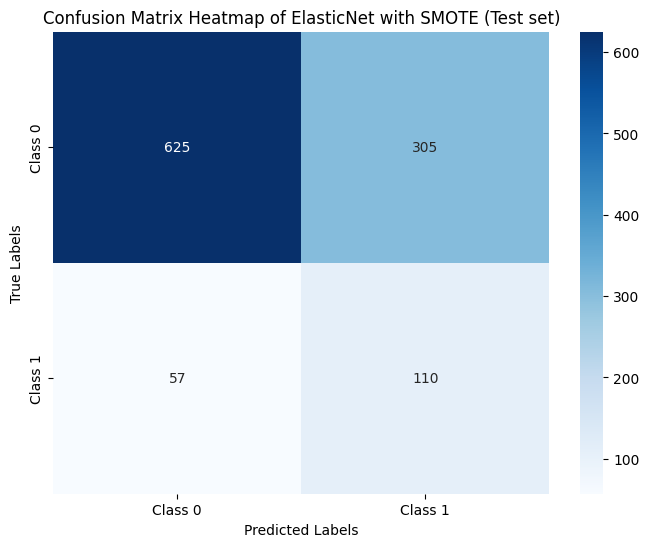

              precision    recall  f1-score   support

     Class 0       0.92      0.67      0.78       930
     Class 1       0.27      0.66      0.38       167

    accuracy                           0.67      1097
   macro avg       0.59      0.67      0.58      1097
weighted avg       0.82      0.67      0.71      1097



In [ ]:
# perform to test set
best_grid = grid.best_estimator_
y_pred_test = best_grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=['Class 0', 'Class 1'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap of ElasticNet with SMOTE (Test set)')
plt.show()

# Display classification report
print(report)

In [ ]:

# Calculate matrics and store in the list
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

results_dict = {
    'model_name': 'ElasticNet (SMOTE)',
    'model_parameters': grid.best_params_,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}
results_list.append(results_dict)

#### **Undersampling**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_var),
        ('cat', 'passthrough', cat_var)],
    remainder='passthrough')

pipe_step = [
    ('scaler', preprocessor),
    ('rus', RandomUnderSampler(random_state=42)),
    ('elas', LogisticRegression(max_iter=10000,solver='saga', penalty = 'elasticnet', random_state=54))
]

param_grid = {
    'elas__C': np.logspace(-3, 3, 7),
    'elas__l1_ratio': [0, 0.25, 0.5, 0.75, 1]
}

pipe = ImbPipeline(pipe_step)
grid = GridSearchCV(pipe, param_grid, cv=5,scoring = scoring, refit="recall",n_jobs=-1)
grid.fit(X_train, y_train)
best_index = grid.best_index_

print(f"Best parameter : {grid.best_params_}")
print(f"F1 score : {grid.best_score_:.2f}")
print(f"Accuracy : {grid.cv_results_["mean_test_accuracy"][best_index]:.2f}")
print(f"Precision : {grid.cv_results_["mean_test_precision"][best_index]:.2f}")
print(f"Recall : {grid.cv_results_["mean_test_recall"][best_index]:.2f}")


Best parameter : {'elas__C': np.float64(1.0), 'elas__l1_ratio': 0.25}
F1 score : 0.68
Accuracy : 0.68
Precision : 0.28
Recall : 0.68


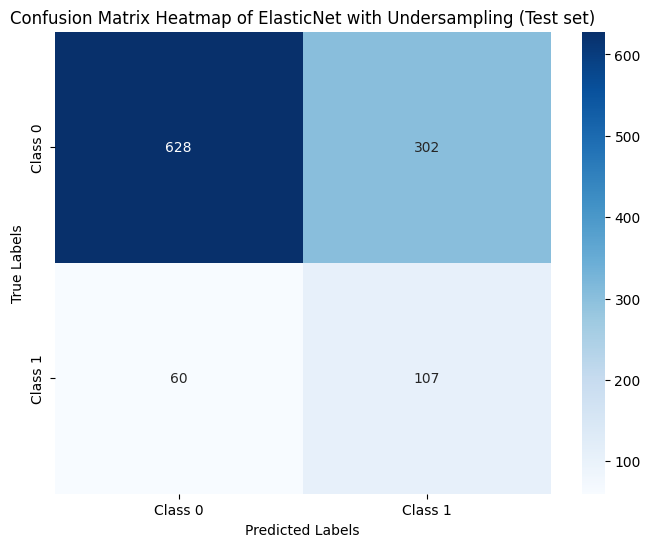

              precision    recall  f1-score   support

     Class 0       0.91      0.68      0.78       930
     Class 1       0.26      0.64      0.37       167

    accuracy                           0.67      1097
   macro avg       0.59      0.66      0.57      1097
weighted avg       0.81      0.67      0.71      1097



In [ ]:
# perform to test set
best_grid = grid.best_estimator_
y_pred_test = best_grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=['Class 0', 'Class 1'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap of ElasticNet with Undersampling (Test set)')
plt.show()

# Display classification report
print(report)

In [ ]:
# Calculate matrics and store in the list
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

results_dict = {
    'model_name': 'ElasticNet (Undersampling)',
    'model_parameters': grid.best_params_,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}
results_list.append(results_dict)

### **K nearest neighbor**

For, KNN we will use `MinMaxScaler` instead of `RobustScaler` due to scale effect.

#### **Oversampling SMOTE**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_var),
        ('cat', 'passthrough', cat_var) ],
    remainder='passthrough')

pipe_step = [
    ('scaler', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier())]

param_grid = {
    'smote__k_neighbors': [3, 5, 7],
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance']
}

pipe = ImbPipeline(pipe_step)
grid = GridSearchCV(pipe, param_grid, cv=5,scoring = scoring, refit="recall",n_jobs=-1)
grid.fit(X_train, y_train)
best_index = grid.best_index_

print(f"Best parameter : {grid.best_params_}")
print(f"F1 score : {grid.best_score_:.2f}")
print(f"Accuracy : {grid.cv_results_["mean_test_accuracy"][best_index]:.2f}")
print(f"Precision : {grid.cv_results_["mean_test_precision"][best_index]:.2f}")
print(f"Recall : {grid.cv_results_["mean_test_recall"][best_index]:.2f}")

Best parameter : {'knn__n_neighbors': 9, 'knn__weights': 'uniform', 'smote__k_neighbors': 5}
F1 score : 0.59
Accuracy : 0.63
Precision : 0.23
Recall : 0.59


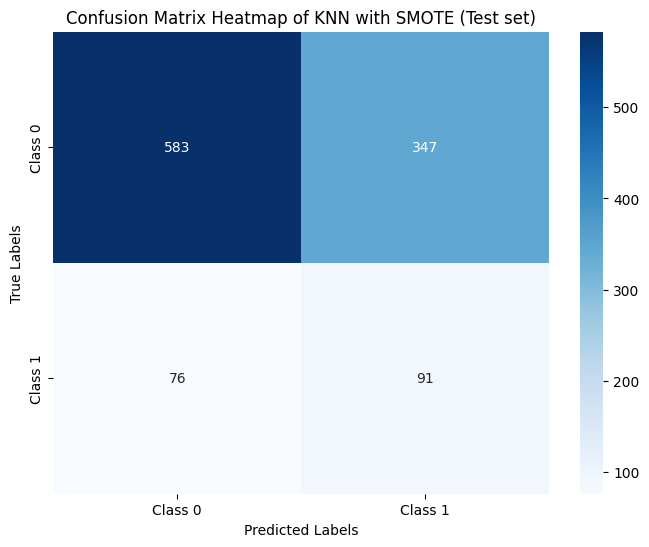

              precision    recall  f1-score   support

     Class 0       0.88      0.63      0.73       930
     Class 1       0.21      0.54      0.30       167

    accuracy                           0.61      1097
   macro avg       0.55      0.59      0.52      1097
weighted avg       0.78      0.61      0.67      1097



In [ ]:
# perform to test set
best_grid = grid.best_estimator_
y_pred_test = best_grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=['Class 0', 'Class 1'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap of KNN with SMOTE (Test set)')
plt.show()

# Display classification report
print(report)

In [ ]:
# Calculate matrics and store in the list
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

results_dict = {
    'model_name': 'KNN (SMOTE)',
    'model_parameters': grid.best_params_,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}
results_list.append(results_dict)

#### **Undersampling**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_var),
        ('cat', 'passthrough', cat_var) ],
    remainder='passthrough')

pipe_step = [
    ('scaler', preprocessor),
    ('rus', RandomUnderSampler(random_state=42)),
    ('knn', KNeighborsClassifier())]

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance']
}

pipe = ImbPipeline(pipe_step)
grid = GridSearchCV(pipe, param_grid, cv=5,scoring = scoring, refit="recall",n_jobs=-1)
grid.fit(X_train, y_train)
best_index = grid.best_index_

print(f"Best parameter : {grid.best_params_}")
print(f"F1 score : {grid.best_score_:.2f}")
print(f"Accuracy : {grid.cv_results_["mean_test_accuracy"][best_index]:.2f}")
print(f"Precision : {grid.cv_results_["mean_test_precision"][best_index]:.2f}")
print(f"Recall : {grid.cv_results_["mean_test_recall"][best_index]:.2f}")

Best parameter : {'knn__n_neighbors': 7, 'knn__weights': 'distance'}
F1 score : 0.63
Accuracy : 0.66
Precision : 0.25
Recall : 0.63


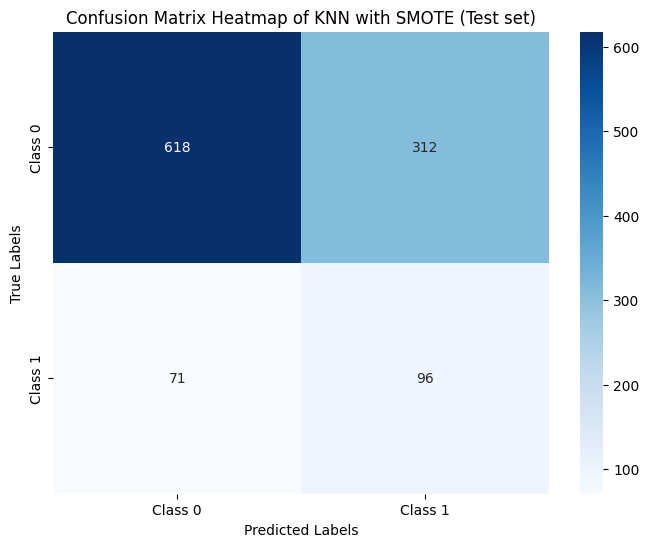

              precision    recall  f1-score   support

     Class 0       0.90      0.66      0.76       930
     Class 1       0.24      0.57      0.33       167

    accuracy                           0.65      1097
   macro avg       0.57      0.62      0.55      1097
weighted avg       0.80      0.65      0.70      1097



In [ ]:
# perform to test set
best_grid = grid.best_estimator_
y_pred_test = best_grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=['Class 0', 'Class 1'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap of KNN with SMOTE (Test set)')
plt.show()

# Display classification report
print(report)

In [ ]:
# Calculate matrics and store in the list
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

results_dict = {
    'model_name': 'KNN (Undersampling)',
    'model_parameters': grid.best_params_,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}
results_list.append(results_dict)

### **Ridge classifier**

#### **Class reweighing**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_var),
        ('cat', 'passthrough', cat_var) ],
    remainder='passthrough')

pipe_step = [
    ('scaler', preprocessor),
    ('ridge', RidgeClassifier(max_iter=10000, random_state=42))]

param_grid = {
    'ridge__alpha': np.logspace(-3, 3, 7),
    'ridge__class_weight' : ['balanced', None, {1: 2},{1: 3},{1: 4},{1: 5}, {1: 6}, {1: 7}, {1: 8}, {1: 9}, {1: 10}]
}

scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
    }

pipe = Pipeline(pipe_step)
grid = GridSearchCV(pipe, param_grid, cv=5,scoring = scoring, refit="recall",n_jobs=-1)
grid.fit(X_train, y_train)
best_index = grid.best_index_

print(f"Best parameter : {grid.best_params_}")
print(f"F1 score : {grid.best_score_:.2f}")
print(f"Accuracy : {grid.cv_results_["mean_test_accuracy"][best_index]:.2f}")
print(f"Precision : {grid.cv_results_["mean_test_precision"][best_index]:.2f}")
print(f"Recall : {grid.cv_results_["mean_test_recall"][best_index]:.2f}")



Best parameter : {'ridge__alpha': np.float64(1000.0), 'ridge__class_weight': {1: 10}}
F1 score : 0.91
Accuracy : 0.45
Precision : 0.20
Recall : 0.91


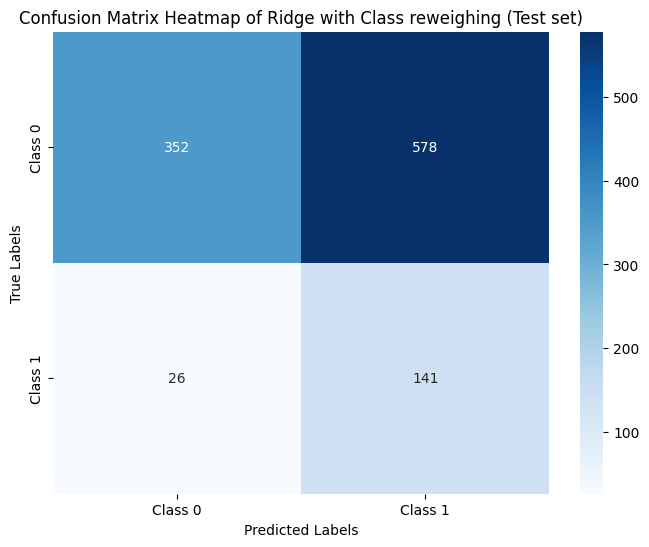

              precision    recall  f1-score   support

     Class 0       0.93      0.38      0.54       930
     Class 1       0.20      0.84      0.32       167

    accuracy                           0.45      1097
   macro avg       0.56      0.61      0.43      1097
weighted avg       0.82      0.45      0.50      1097



In [ ]:
# perform to test set
best_grid = grid.best_estimator_
y_pred_test = best_grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=['Class 0', 'Class 1'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap of Ridge with Class reweighing (Test set)')
plt.show()

# Display classification report
print(report)

In [ ]:
# Calculate matrics and store in the list
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

results_dict = {
    'model_name': 'Ridge (Class Reweighting)',
    'model_parameters': grid.best_params_,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}
results_list.append(results_dict)

#### **Oversampling SMOTE**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_var),
        ('cat', 'passthrough', cat_var)],
    remainder='passthrough')

pipe_step = [
    ('scaler', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('ridge', RidgeClassifier(max_iter=10000, random_state=42))
]

param_grid = {
    'smote__k_neighbors': [3, 5, 7],
    'ridge__alpha': np.logspace(-3, 3, 7),
}

pipe = ImbPipeline(pipe_step)
grid = GridSearchCV(pipe, param_grid, cv=5,scoring = scoring, refit="recall",n_jobs=-1)
grid.fit(X_train, y_train)
best_index = grid.best_index_

print(f"Best parameter : {grid.best_params_}")
print(f"F1 score : {grid.best_score_:.2f}")
print(f"Accuracy : {grid.cv_results_["mean_test_accuracy"][best_index]:.2f}")
print(f"Precision : {grid.cv_results_["mean_test_precision"][best_index]:.2f}")
print(f"Recall : {grid.cv_results_["mean_test_recall"][best_index]:.2f}")


Best parameter : {'ridge__alpha': np.float64(0.001), 'smote__k_neighbors': 5}
F1 score : 0.70
Accuracy : 0.67
Precision : 0.28
Recall : 0.70


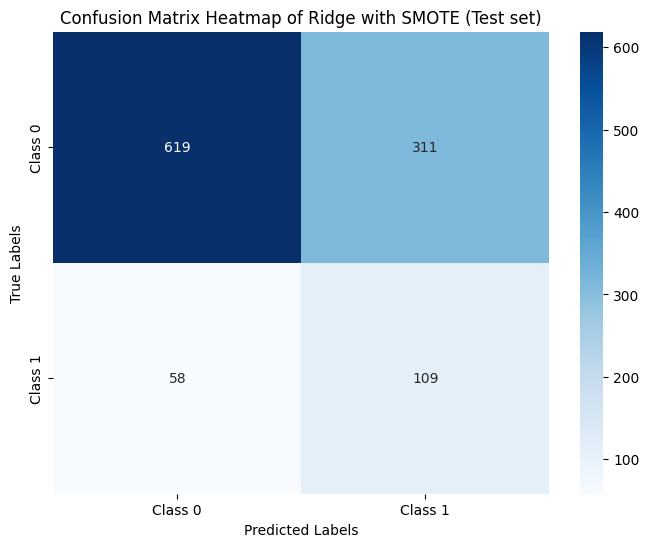

              precision    recall  f1-score   support

     Class 0       0.91      0.67      0.77       930
     Class 1       0.26      0.65      0.37       167

    accuracy                           0.66      1097
   macro avg       0.59      0.66      0.57      1097
weighted avg       0.81      0.66      0.71      1097



In [ ]:
# perform to test set
best_grid = grid.best_estimator_
y_pred_test = best_grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=['Class 0', 'Class 1'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap of Ridge with SMOTE (Test set)')
plt.show()

# Display classification report
print(report)

In [ ]:
# Calculate matrics and store in the list
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

results_dict = {
    'model_name': 'Ridge (SMOTE)',
    'model_parameters': grid.best_params_,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}
results_list.append(results_dict)

#### **Undersampling**

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_var),
        ('cat', 'passthrough', cat_var)],
    remainder='passthrough')

pipe_step = [
    ('scaler', preprocessor),
    ('rus', RandomUnderSampler(random_state=42)),
    ('ridge', RidgeClassifier(max_iter=10000, random_state=42))
]

param_grid = {
    'ridge__alpha': np.logspace(-3, 3, 7),
}

pipe = ImbPipeline(pipe_step)
grid = GridSearchCV(pipe, param_grid, cv=5,scoring = scoring, refit="recall",n_jobs=-1)
grid.fit(X_train, y_train)
best_index = grid.best_index_

print(f"Best parameter : {grid.best_params_}")
print(f"F1 score : {grid.best_score_:.2f}")
print(f"Accuracy : {grid.cv_results_["mean_test_accuracy"][best_index]:.2f}")
print(f"Precision : {grid.cv_results_["mean_test_precision"][best_index]:.2f}")
print(f"Recall : {grid.cv_results_["mean_test_recall"][best_index]:.2f}")


Best parameter : {'ridge__alpha': np.float64(0.001)}
F1 score : 0.68
Accuracy : 0.68
Precision : 0.28
Recall : 0.68


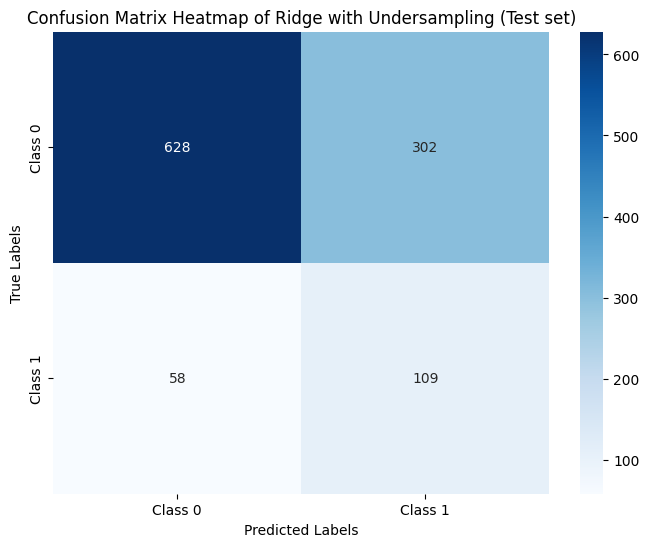

              precision    recall  f1-score   support

     Class 0       0.92      0.68      0.78       930
     Class 1       0.27      0.65      0.38       167

    accuracy                           0.67      1097
   macro avg       0.59      0.66      0.58      1097
weighted avg       0.82      0.67      0.72      1097



In [ ]:
# perform to test set
best_grid = grid.best_estimator_
y_pred_test = best_grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=['Class 0', 'Class 1'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap of Ridge with Undersampling (Test set)')
plt.show()

# Display classification report
print(report)

In [ ]:
# Calculate matrics and store in the list
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

results_dict = {
    'model_name': 'Ridge (Undersampling)',
    'model_parameters': grid.best_params_,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1
}
results_list.append(results_dict)

## **Summary**

In [ ]:
result = pd.DataFrame(results_list)
result.sort_values(by='recall', ascending=False)


,model_name,model_parameters,accuracy,precision,recall,f1_score
0,Logistic Regression (Class Reweighting),"{'log__C': 0.001, 'log__class_weight': {1: 10}...",0.375570,0.181818,0.886228,0.301733
3,ElasticNet (Class Reweighting),"{'elas__C': 0.001, 'elas__class_weight': {1: 6...",0.273473,0.159827,0.886228,0.270814
8,Ridge (Class Reweighting),"{'ridge__alpha': 1000.0, 'ridge__class_weight'...",0.449407,0.196106,0.844311,0.318284
2,Logistic Regression (Undersampling),"{'log__C': 0.001, 'log__penalty': 'l2'}",0.513218,0.202593,0.748503,0.318878
1,Logistic Regression (SMOTE),"{'log__C': 0.001, 'log__penalty': 'l2', 'smote...",0.577940,0.221805,0.706587,0.337625
4,ElasticNet (SMOTE),"{'elas__C': 0.1, 'elas__l1_ratio': 1, 'smote__...",0.670009,0.265060,0.658683,0.378007
9,Ridge (SMOTE),"{'ridge__alpha': 0.001, 'smote__k_neighbors': 5}",0.663628,0.259524,0.652695,0.371380
10,Ridge (Undersampling),{'ridge__alpha': 0.001},0.671832,0.265207,0.652695,0.377163
5,ElasticNet (Undersampling),"{'elas__C': 1.0, 'elas__l1_ratio': 0.25}",0.670009,0.261614,0.640719,0.371528
7,KNN (Undersampling),"{'knn__n_neighbors': 7, 'knn__weights': 'dista...",0.650866,0.235294,0.574850,0.333913


For this critical CHD risk classification problem, Recall is considered as the main evaluation metric. This choice directly reflects a critical assessment of error costs: Failing to recognize a positive case (a False Negative) is life-threatening On the other hand, False Positives (incorrectly flagging a healthy patient) are a lower-cost error, typically resulting only in manageable issues like minor patient stress and unnecessary clinical follow-up.

The best model is Logistic Regression by class reweighting with hyper parameter `C=0.001`, `class_weight={1:10}` and `penalty='l2'`

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', RobustScaler(), num_var),
        ('cat', 'passthrough', cat_var) ],
    remainder='passthrough')

pipe_step = [
    ('scaler', preprocessor),
    ('log', LogisticRegression(max_iter=10000,solver='liblinear', random_state=42))]

param_grid = {
    'log__C': [0.001],
    'log__penalty': ['l2'],
    'log__class_weight' : [{1: 10}]
}

scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'precision': 'precision',
    'recall': 'recall'
    }

pipe = Pipeline(pipe_step)
grid = GridSearchCV(pipe, param_grid, cv=5,scoring = scoring, refit="recall",n_jobs=-1)
grid.fit(X_train, y_train)
best_index = grid.best_index_

print(f"Best parameter : {grid.best_params_}")
print(f"F1 score : {grid.best_score_:.2f}")
print(f"Accuracy : {grid.cv_results_["mean_test_accuracy"][best_index]:.2f}")
print(f"Precision : {grid.cv_results_["mean_test_precision"][best_index]:.2f}")
print(f"Recall : {grid.cv_results_["mean_test_recall"][best_index]:.2f}")



Best parameter : {'log__C': 0.001, 'log__class_weight': {1: 10}, 'log__penalty': 'l2'}
F1 score : 0.93
Accuracy : 0.38
Precision : 0.19
Recall : 0.93


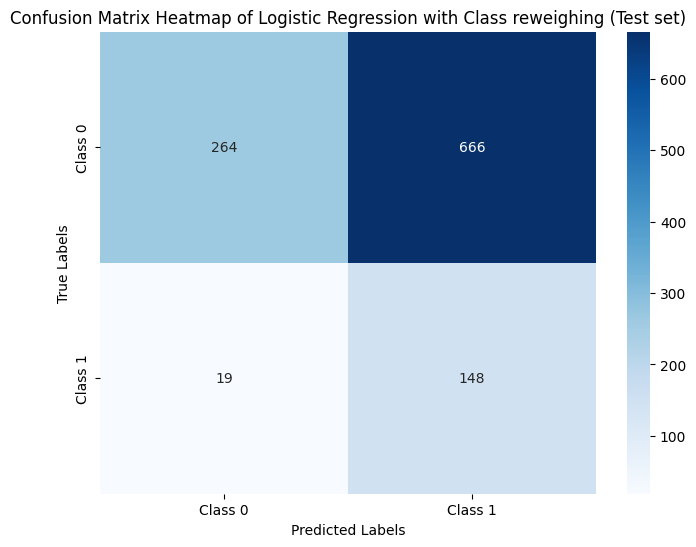

              precision    recall  f1-score   support

     Class 0       0.93      0.28      0.44       930
     Class 1       0.18      0.89      0.30       167

    accuracy                           0.38      1097
   macro avg       0.56      0.59      0.37      1097
weighted avg       0.82      0.38      0.41      1097



In [ ]:
# perform to test set
best_grid = grid.best_estimator_
y_pred_test = best_grid.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
report = classification_report(y_test, y_pred_test, target_names=['Class 0', 'Class 1'])

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap of Logistic Regression with Class reweighing (Test set)')
plt.show()

# Display classification report
print(report)

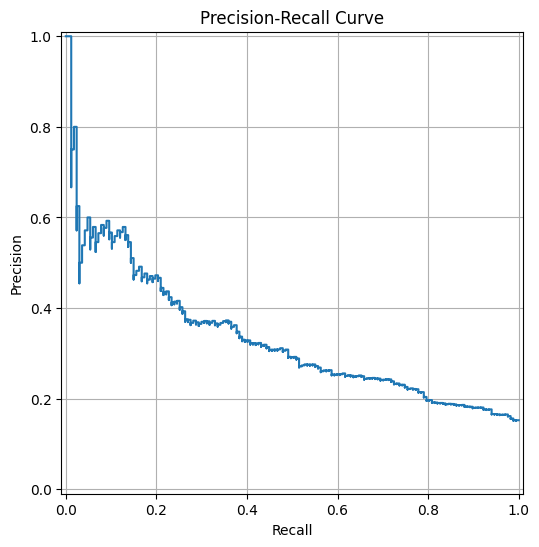

In [ ]:
# Get predicted probabilities for the positive class
y_pred_proba = best_grid.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot the Precision-Recall curve
fig, ax = plt.subplots(figsize=(10, 6))
display = PrecisionRecallDisplay(precision=precision, recall=recall)
display.plot(ax=ax)
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


In [ ]:
# find coefficient of logistic regression
coef = best_grid['log'].coef_
coef_df = pd.DataFrame(coef, columns=X_train.columns)
coef_df = coef_df.T
coef_df.columns = ['coef']
coef_df.sort_values(by='coef', ascending=False)

,coef
sex,0.322868
bp_meds,0.241150
sys_bp,0.179089
heart_rate,0.139387
age,0.129876
total_chol,0.092698
prevalent_stroke,0.091895
cig_per_day,0.085410
prevalenthyp,0.064090
dia_bp,0.032149


**Strongest Positive Predictors**

**Sex (0.323)**: Being male significantly increases CHD risk. This is the strongest predictor in the model, consistent with medical literature showing higher cardiovascular disease rates in men.

**BP Meds (0.241)**: Patients on blood pressure medication show substantially elevated CHD risk. This likely indicates underlying hypertension management and pre-existing cardiovascular conditions.

**Systolic BP (0.179)**: Higher systolic blood pressure is a major risk factor, directly associated with increased cardiovascular strain and CHD development.

**Heart Rate (0.139)**: Elevated resting heart rate shows moderate positive association with CHD risk, potentially indicating cardiovascular stress or reduced cardiac efficiency.

**Age (0.130)**: Older patients face higher CHD risk, reflecting the cumulative effect of age-related cardiovascular deterioration.

## Suggestions for Further Model Improvement
Based on the current implementation with Logistic Regression achieving the best recall performance. However, the model can be further improved as follows.

**Explore Other Models**: Implement Gredient boosting or tree base model with class weight parameter, which often handle imbalanced medical data more effectively than linear models.<br>
**Try Advanced Resampling**: Experiment with SMOTEENN or SMOTETomek to combine oversampling with data cleaning, creating higher-quality synthetic samples and reducing noise.<br>
**Feature Engineering**: Create interaction terms between key predictors (e.g., age × sys_bp, sex × prevalenthyp) and polynomial features to capture non-linear relationships in cardiovascular risk.<br>
**Ensemble Methods**: Build a VotingClassifier or StackingClassifier combining your best Logistic Regression, Ridge, and tree-based models to leverage different algorithm strengths and improve robustness.<br>
**Collect More Minority Class Data**: If feasible, gather additional CHD-positive cases from other medical databases to naturally balance the dataset and improve model generalization.<br>
